In [57]:
#Packages to be installed before starting the jupyter notebook
#pip install biopython

import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os


In [16]:
#Use Bio.SeqIO from Biopython for parsing DNA sequence data 
# The original Wuhan strain in fasta format downloaded from NCBI website: https://www.ncbi.nlm.nih.gov/nuccore/MN908947
from Bio import SeqIO 
for sequence in SeqIO.parse('MN908947.3.fasta', "fasta"):
    print(sequence.seq)
    print(len(sequence),'nucleotides')

ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTGGTACACGGAACGTTCT

In [58]:
#Loading Complementary DNA Sequence into an alignable file
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO
DNAsequence = SeqIO.read('MN908947.3.fasta', "fasta")

In [18]:
#Converting the DNA sequence object into mRNA Sequence using transcribe() function
DNA = DNAsequence.seq 
mRNA = DNA.transcribe() #Transcribe a DNA sequence into RNA.
print(mRNA)
print('Size : ',len(mRNA))

AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUCUUGUAGAUCUGUUCUCUAAACGAACUUUAAAAUCUGUGUGGCUGUCACUCGGCUGCAUGCUUAGUGCACUCACGCAGUAUAAUUAAUAACUAAUUACUGUCGUUGACAGGACACGAGUAACUCGUCUAUCUUCUGCAGGCUGCUUACGGUUUCGUCCGUGUUGCAGCCGAUCAUCAGCACAUCUAGGUUUCGUCCGGGUGUGACCGAAAGGUAAGAUGGAGAGCCUUGUCCCUGGUUUCAACGAGAAAACACACGUCCAACUCAGUUUGCCUGUUUUACAGGUUCGCGACGUGCUCGUACGUGGCUUUGGAGACUCCGUGGAGGAGGUCUUAUCAGAGGCACGUCAACAUCUUAAAGAUGGCACUUGUGGCUUAGUAGAAGUUGAAAAAGGCGUUUUGCCUCAACUUGAACAGCCCUAUGUGUUCAUCAAACGUUCGGAUGCUCGAACUGCACCUCAUGGUCAUGUUAUGGUUGAGCUGGUAGCAGAACUCGAAGGCAUUCAGUACGGUCGUAGUGGUGAGACACUUGGUGUCCUUGUCCCUCAUGUGGGCGAAAUACCAGUGGCUUACCGCAAGGUUCUUCUUCGUAAGAACGGUAAUAAAGGAGCUGGUGGCCAUAGUUACGGCGCCGAUCUAAAGUCAUUUGACUUAGGCGACGAGCUUGGCACUGAUCCUUAUGAAGAUUUUCAAGAAAACUGGAACACUAAACAUAGCAGUGGUGUUACCCGUGAACUCAUGCGUGAGCUUAACGGAGGGGCAUACACUCGCUAUGUCGAUAACAACUUCUGUGGCCCUGAUGGCUACCCUCUUGAGUGCAUUAAAGACCUUCUAGCACGUGCUGGUAAAGCUUCAUGCACUUUGUCCGAACAACUGGACUUUAUUGACACUAAGAGGGGUGUAUACUGCUGCCGUGAACAUGAGCAUGAAAUUGCUUGGUACACGGAACGUUCU

In [59]:
#Translate the mRNA to protein sequence
Amino_Acid = mRNA.translate(table=1, cds=False)
print('Amino Acid', Amino_Acid)
print("Length of Protein:",len(Amino_Acid))
print("Length of Original mRNA:",len(mRNA))

Amino Acid IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER*DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS*RWHLWLSRS*KRRFAST*TALCVHQTFGCSNCTSWSCYG*AGSRTRRHSVRS*W*DTWCPCPSCGRNTSGLPQGSSS*ER**RSWWP*LRRRSKVI*LRRRAWH*SL*RFSRKLEH*T*QWCYP*THA*A*RRGIHSLCR*QLLWP*WLPS*VH*RPSSTCW*SFMHFVRTTGLY*H*EGCILLP*T*A*NCLVHGTF*KEL*IADTF*N*IGKEI*HLQWGMSKFCISLKFHNQDYSTKG*KEKA*WLYG*NSICLSSCVTK*MQPNVPFNSHEV*SLW*NFMADGRFC*SHLRILWH*EFD*RRCHYLWLLTPKCCC*NLLSSMSQFRSRT*A*SCRIP**IWLENHSS*GWSHYCLWRLCVLLCWLP*QVCLLGSTC*R*HRL*PYRCCWRRFRRS**QPS*NTPKRESQHQYCW*L*T**RDRHYFGIFFCFHKCFCGNCERFGL*SIQTNC*ILW*F*SYKRKS*KRCLEYW*TEINTESSLCICIRGCSCCTINFLPHS*NCSKFCACFTEGRYNNTRWNFTVFTETH*CYDVHI*FGY*QSSCNGLHYRWCCSVDFAVAN*HLWHCL*KTQTRP*LA*REV*GRCRVS*RRLGNC*IYLNLCL*NCRWTNCHLCKGN*GECSDIL*ACK*IFGFVC*LYHYWWS*T*SLEFR*NICHALKGIVQKVC*IQRRNWPTHASKSPKRNYLLRGRNTSHRSVNRGSCLENW*FTTIRTTY**SC*SSIGWYTSLY*RAYVARNQRHRKVLCPCT*YDGNKQYLHTQRRCTNKGYFW**HCDRSARLQECEYHF*T**KD**ST**EVLCLYS*TRYRSK*VRLCCGRCCHKNFATSI*ITYTTGH*FR*VE

/home/savita/.local/lib/python3.8/site-packages/Bio/Seq.py:2334: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


In [60]:
from Bio.Data import CodonTable
print(CodonTable.unambiguous_rna_by_name['Standard'])

Table 1 Standard, SGC0

  |  U      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
U | UUU F   | UCU S   | UAU Y   | UGU C   | U
U | UUC F   | UCC S   | UAC Y   | UGC C   | C
U | UUA L   | UCA S   | UAA Stop| UGA Stop| A
U | UUG L(s)| UCG S   | UAG Stop| UGG W   | G
--+---------+---------+---------+---------+--
C | CUU L   | CCU P   | CAU H   | CGU R   | U
C | CUC L   | CCC P   | CAC H   | CGC R   | C
C | CUA L   | CCA P   | CAA Q   | CGA R   | A
C | CUG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | AUU I   | ACU T   | AAU N   | AGU S   | U
A | AUC I   | ACC T   | AAC N   | AGC S   | C
A | AUA I   | ACA T   | AAA K   | AGA R   | A
A | AUG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GUU V   | GCU A   | GAU D   | GGU G   | U
G | GUC V   | GCC A   | GAC D   | GGC G   | C
G | GUA V   | GCA A   | GAA E   | GGA G   | A
G | GUG V   | GCG A   | GAG E   | GGG G   | G
--+---------

In [61]:
#Identify all the Proteins from translated sequence and split on '*' which is a stop codon and store in a dataframe
Proteins = Amino_Acid.split('*') # * is translated stop codon
df = pd.DataFrame(Proteins)
df.describe()

,0
count,775
unique,625
top,()
freq,69


In [63]:
#Two tiny functions are defined here, that calculate len and convert an item to string
def conv(item):
    return len(item) 

def to_str(item):
    return str(item) 

df['sequence_str'] = df[0].apply(to_str)
df['length'] = df[0].apply(conv)
df.rename(columns={0: "sequence"}, inplace=True)
df.head() 



,sequence,sequence_str,length
0,"(I, K, G, L, Y, L, P, R)",IKGLYLPR,8
1,"(Q, T, N, Q, L, S, I, S, C, R, S, V, L)",QTNQLSISCRSVL,13
2,"(T, N, F, K, I, C, V, A, V, T, R, L, H, A)",TNFKICVAVTRLHA,14
3,"(C, T, H, A, V)",CTHAV,5
4,"(L, I, T, N, Y, C, R)",LITNYCR,7


In [64]:
#Remove any sequence less than 20 amino acids long and convert to string and return it length
functional_proteins = df.loc[df['length'] >= 20]
print('Total functional proteins:', len(functional_proteins))
functional_proteins.describe()

Total functional proteins: 80


,length
count,80.000000
mean,67.262500
std,299.955767
min,20.000000
25%,22.000000
50%,25.000000
75%,36.000000
max,2701.000000


In [80]:
# Check if only proteins longer than 20 amino acids are taken
functional_proteins.head()

,sequence,sequence_str,length
5,"(Q, D, T, S, N, S, S, I, F, C, R, L, L, T, V, ...",QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER,35
6,"(D, G, E, P, C, P, W, F, Q, R, E, N, T, R, P, ...",DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS,46
9,"(T, A, L, C, V, H, Q, T, F, G, C, S, N, C, T, ...",TALCVHQTFGCSNCTSWSCYG,21
12,"(D, T, W, C, P, C, P, S, C, G, R, N, T, S, G, ...",DTWCPCPSCGRNTSGLPQGSSS,22
39,"(H, L, Q, W, G, M, S, K, F, C, I, S, L, K, F, ...",HLQWGMSKFCISLKFHNQDYSTKG,24


In [97]:
#Protein Analysis With The Protparam Module In Biopython.
from __future__ import division
poi_list = []
MW_list =[]
from Bio.SeqUtils import ProtParam

for record in Proteins[:]:
    print("\n")
    X = ProtParam.ProteinAnalysis(str(record))
    POI = X.count_amino_acids()
    poi_list.append(POI)
    MW = X.molecular_weight()
    MW_list.append(MW)
    
    print("Protein of Interest = ", POI)
    #print("Amino acids percent =    ",str(X.get_amino_acids_percent()))
    #print("Molecular weight = ", MW_list)
    #print("Aromaticity = ", X.aromaticity())
    print("Flexibility = ", X.flexibility())
    #print("Isoelectric point = ", X.isoelectric_point())
    #print("Secondary structure fraction = ",   X.secondary_structure_fraction())



Protein of Interest =  {'A': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0, 'G': 1, 'H': 0, 'I': 1, 'K': 1, 'L': 2, 'M': 0, 'N': 0, 'P': 1, 'Q': 0, 'R': 1, 'S': 0, 'T': 0, 'V': 0, 'W': 0, 'Y': 1}
Flexibility =  []


Protein of Interest =  {'A': 0, 'C': 1, 'D': 0, 'E': 0, 'F': 0, 'G': 0, 'H': 0, 'I': 1, 'K': 0, 'L': 2, 'M': 0, 'N': 1, 'P': 0, 'Q': 2, 'R': 1, 'S': 3, 'T': 1, 'V': 1, 'W': 0, 'Y': 0}
Flexibility =  [1.0195, 0.9710238095238095, 1.0122976190476192, 0.9595714285714285]


Protein of Interest =  {'A': 2, 'C': 1, 'D': 0, 'E': 0, 'F': 1, 'G': 0, 'H': 1, 'I': 1, 'K': 1, 'L': 1, 'M': 0, 'N': 1, 'P': 0, 'Q': 0, 'R': 1, 'S': 0, 'T': 2, 'V': 2, 'W': 0, 'Y': 0}
Flexibility =  [0.9642380952380952, 0.9644285714285714, 0.9676071428571428, 0.9502976190476191, 0.9701190476190475]


Protein of Interest =  {'A': 1, 'C': 1, 'D': 0, 'E': 0, 'F': 0, 'G': 0, 'H': 1, 'I': 0, 'K': 0, 'L': 0, 'M': 0, 'N': 0, 'P': 0, 'Q': 0, 'R': 0, 'S': 0, 'T': 1, 'V': 1, 'W': 0, 'Y': 0}
Flexibility =  []


Protein of Interes

<BarContainer object of 20 artists>

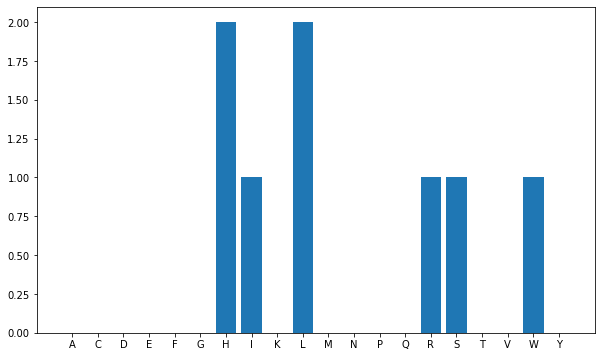

In [98]:
#plot the results
MoW = pd.DataFrame(data = MW_list,columns = ["Molecular Weights"] ) #plot POI
poi_list = poi_list[46];
plt.figure(figsize=(10,6));
plt.bar(poi_list.keys(), list(poi_list.values()), align='center')

In [112]:
#Comparing Human Coronavirus RNA - compare the similarity among COVID-19/COV2, MERS, and SARS.
#Load the DNA sequence file (FASTA) each of SARS, MERS, and COVID-19.
##Sequence Lengths: SARS: 29751, COV2: 29903, MERS: 30119
#Before comparing the similarity let us visualize the DNA each of COV2, SARS, and MERS respectively

from Bio import pairwise2
SARS = SeqIO.read("SARS.fasta", "fasta")
MERS = SeqIO.read("MERS.fasta", "fasta")
COV2 = SeqIO.read("COV2.fasta", "fasta")

In [113]:
# Alignments using pairwise2 algorithm
SARS_COV = pairwise2.align.globalxx(SARS.seq, COV2.seq, one_alignment_only=True, score_only=True)
print('SARS/COV Similarity (%):', SARS_COV / len(SARS.seq) * 100)
MERS_COV = pairwise2.align.globalxx(MERS.seq, COV2.seq, one_alignment_only=True, score_only=True)
print('MERS/COV Similarity (%):', MERS_COV / len(MERS.seq) * 100)
MERS_SARS = pairwise2.align.globalxx(MERS.seq, SARS.seq, one_alignment_only=True, score_only=True)
print('MERS/SARS Similarity (%):', MERS_SARS / len(SARS.seq) * 100)


SARS/COV Similarity (%): 83.33837518066619
MERS/COV Similarity (%): 69.39141405757164
MERS/SARS Similarity (%): 69.93714496991697


<BarContainer object of 3 artists>

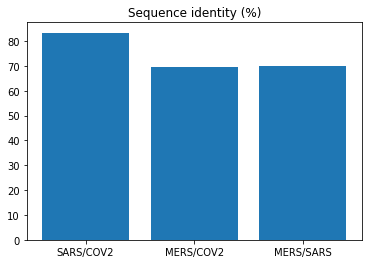

In [114]:
# Plot the data
X = ['SARS/COV2', 'MERS/COV2', 'MERS/SARS']
Y = [SARS_COV/ len(SARS.seq) * 100, MERS_COV/ len(MERS.seq)*100, MERS_SARS/len(SARS.seq)*100]
plt.title('Sequence identity (%)')
plt.bar(X,Y)